# Cancer Diagnosis Prediction - KNN
In this project, we aim to classify canser diagnosis as benign or malignant using a dataset that contains 32 features. The goal is to build a predictive model that assists in early cancer detection.

### Importing the relevant libraries

In [3]:
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import neighbors
from sklearn import metrics
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

### Load and preview the dataset

In [5]:
raw_data = pd.read_csv("Cancer_Diagnosis_Data.csv")
raw_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Drop unnecessary columns

In [7]:
data = raw_data.drop(["id","Unnamed: 32"] , axis = 1)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Checking for missing values

In [9]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## Dealing with outliers

array([[<Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>],
       [<Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>],
       [<Axes: title={'center': 'radius_se'}>,
        <Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'perimeter_se'}>,
        <Axes: title={'center': 'area_se'}>,
        <Axes: title={'center': 'smoothness_se'}>],
       [<Axes: title={'center': 'compactness_se'}>,
        <Axes: title={'center': 'concavity_se'}>,
        <Axes: title={'center': 'concave points_se'}>,
        <Axes: title={'center': 'symmetry_se'}>,
        <Axes: title={'ce

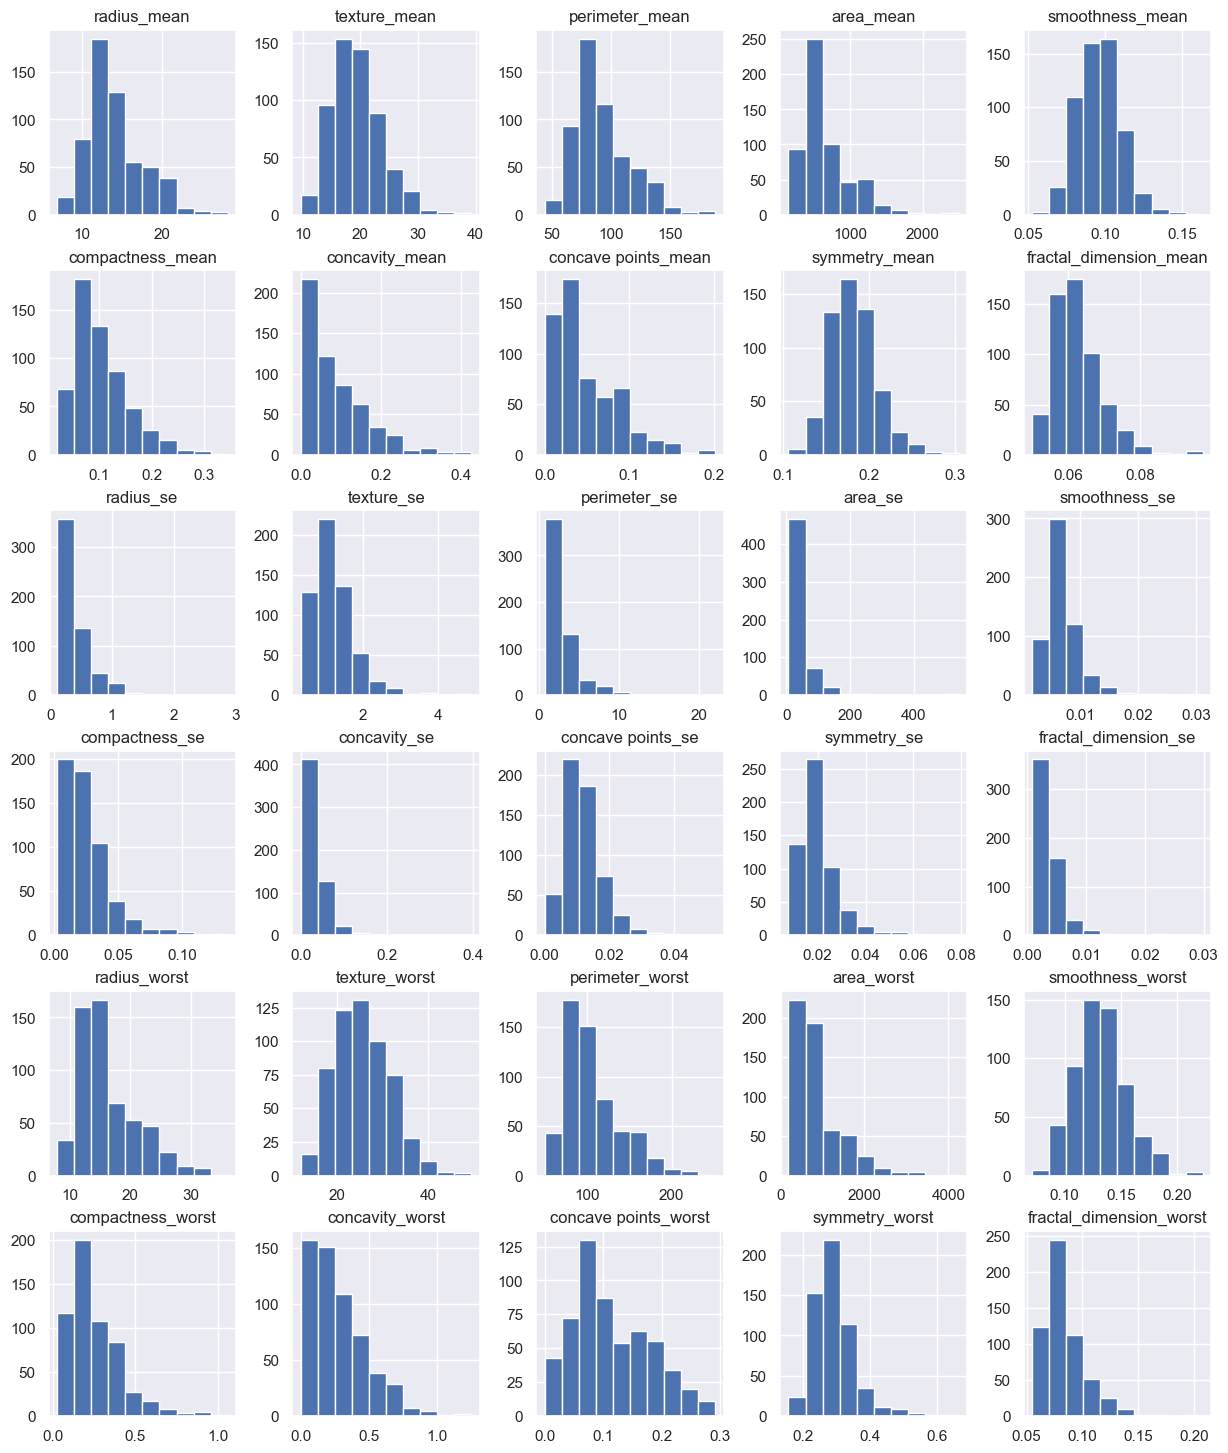

In [11]:
data.hist(figsize = (15,18))

In [12]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [13]:
# removing the outliers of all columns 
def remove_outliers(df):
    #only choose numeric columns
    numeric_cols = df.select_dtypes(include=["number"]).columns
    for col in numeric_cols:
        Q1=df[col].quantile(0.25)
        Q3= df[col].quantile(0.75)
        IQR = Q3-Q1
        lower_bound =Q1 - IQR *2.5
        upper_bound = Q3 + IQR * 2.5
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df
# use function and get no(less) outlier data
data_no_outlier = remove_outliers(data)

### Determine iputs and target

In [15]:
inputs = data_no_outlier.drop(["diagnosis"] , axis = 1)
target = data_no_outlier["diagnosis"]

### Scalling numeric features

In [17]:
scaler = preprocessing.StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)

### Split the dataset into training and testing sets

In [19]:
x_train , x_test , y_train , y_test = model_selection.train_test_split(inputs_scaled , target , test_size = 0.3 ,random_state = 42)

## Train a K-Nearest neighbors (KNN) classifier

In [21]:
neigh = neighbors.KNeighborsClassifier(n_neighbors = 3)
neigh.fit(x_train , y_train)

KNeighborsClassifier(n_neighbors=3)

## Test the model
Testing the model with accuracy and confusion matrix

In [23]:
y_test_hat = neigh.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test , y_test_hat),"\n")
cm = metrics.confusion_matrix(y_test_hat, y_test)
cm_df = pd.DataFrame(cm, 
                     index=['Actual Benign', 'Actual Malignant'],
                     columns=['Predicted Benign', 'Predicted Malignant'])
print(cm_df)

Accuracy: 0.9548872180451128 

                  Predicted Benign  Predicted Malignant
Actual Benign                   93                    5
Actual Malignant                 1                   34


## Checking for diffrenet n_neighbors
(n_neighbors=3) seems to be the highest accuracy due to the accuracy score and confusion matrix

In [25]:
for k in range(1,6):
    neigh = neighbors.KNeighborsClassifier(n_neighbors = k)
    neigh.fit(x_train , y_train)
    y_test_hat = neigh.predict(x_test)
    cm = metrics.confusion_matrix(y_test_hat, y_test)
    cm_df = pd.DataFrame(cm, 
                     index=['Actual Benign', 'Actual Malignant'],
                     columns=['Predicted Benign', 'Predicted Malignant']) 
    print(f"{k} ->{cm_df} ,  Accuracy:{metrics.accuracy_score(y_test_hat , y_test)}: ",end="\n\n")

1 ->                  Predicted Benign  Predicted Malignant
Actual Benign                   90                    7
Actual Malignant                 4                   32 ,  Accuracy:0.9172932330827067: 

2 ->                  Predicted Benign  Predicted Malignant
Actual Benign                   94                   10
Actual Malignant                 0                   29 ,  Accuracy:0.924812030075188: 

3 ->                  Predicted Benign  Predicted Malignant
Actual Benign                   93                    5
Actual Malignant                 1                   34 ,  Accuracy:0.9548872180451128: 

4 ->                  Predicted Benign  Predicted Malignant
Actual Benign                   94                    8
Actual Malignant                 0                   31 ,  Accuracy:0.9398496240601504: 

5 ->                  Predicted Benign  Predicted Malignant
Actual Benign                   92                    6
Actual Malignant                 2                   33 ,  Ac